# Download Required Packages

In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [223]:
temp_data = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

x_index = 18
y_index = 14
bathrooms_i = 1
bedrooms_i = 2
daysOnMarket_i = 6
lotSize_i = 13
price_i = 14
propertyType_i = 15
squareFootage_i = 18
status_i = 20
yearBuilt_i = 21

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[price_i] > 0 and d[price_i] < 1_000_000 and d[bathrooms_i] > 0 and d[bedrooms_i] > 0 and d[daysOnMarket_i] > 0 and d[lotSize_i] > 0 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and d[yearBuilt_i] > 0 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active':
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area vs Price

Number of data points included: 4553


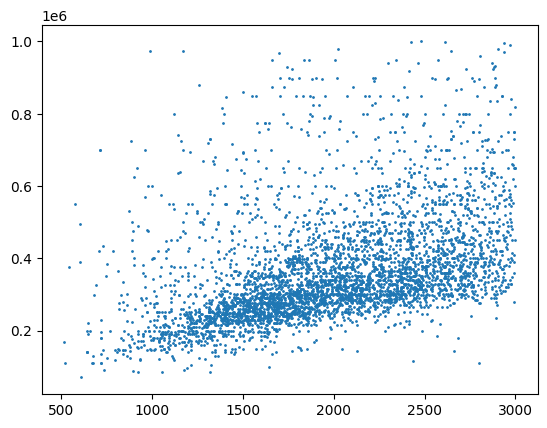

In [224]:
plt.scatter(data[:, x_index], data[:, y_index], s=1)
print("Number of data points included:", len(data))

# Run 2D Gradient Descent Algo

[0/1]: x0 = 0.12354598245297305 x1=189.71081339768747


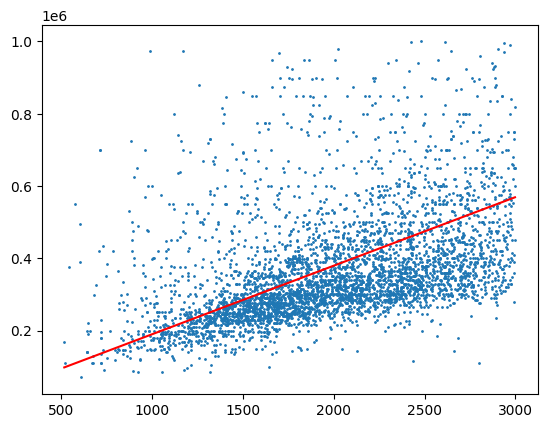

theta_0:  [0.12354598]
theta_1:  [189.7108134]


In [225]:
placeholder_x = np.arange(np.amin(data[:, x_index]), np.amax(data[:,x_index]))

def sgd(data, training_rate=0.000000001, iters=1):
    theta = np.array([[0],[0]])
    X = data[:, [x_index]].astype(int)
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [y_index]].T[0].astype(int)

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, x_index], data[:, y_index], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


theta = sgd(data)
print("theta_0: ", theta[0])
print("theta_1: ", theta[1])


In [226]:
X = data[:, x_index]
Y = data[:, y_index]

i = 0
errors = []
for x, y in zip(X,Y):
    y_pred = theta[0] + theta[1] * x
    error = y - y_pred
    errors.append((error[0], i, x, y, y_pred[0], stringData[i][0]))
    i += 1

errors.sort()

print('i', '\t', 'error', '\t\t\t', 'x', '\t\t', 'y', '\t\t', 'y_pred', '\t\t', 'address')
for listing in errors:
    print(listing[1], '\t', listing[0], '\t', listing[2], '\t', listing[3], '\t', listing[4], '\t', listing[5])


i 	 error 			 x 		 y 		 y_pred 		 address
1976 	 -421190.4010595074 	 2800.0 	 110000.0 	 531190.4010595074 	 16003 Antelope Ln
3419 	 -362230.88718383113 	 2660.0 	 142400.0 	 504630.88718383113 	 16783 Springfield Dr
474 	 -346856.2433559538 	 2434.0 	 114900.0 	 461756.2433559538 	 976 Marjorie St
2820 	 -328904.52507858025 	 2682.0 	 179900.0 	 508804.52507858025 	 S781005 Peach Creek For Peach Creek Frst
4132 	 -314212.9283322877 	 2895.0 	 235000.0 	 549212.9283322877 	 5419 Bent Bough Ln
2170 	 -302277.4923512439 	 2568.0 	 184900.0 	 487177.4923512439 	 901 N Jones St
2781 	 -288614.8772318633 	 2992.0 	 279000.0 	 567614.8772318633 	 2323 Whispering Pines St
2563 	 -282373.99282981607 	 2753.0 	 239900.0 	 522273.99282981607 	 4223 Brookhead Trl
4178 	 -280261.4823992761 	 2900.0 	 269900.0 	 550161.4823992761 	 7414 Mustang Corral Dr
4534 	 -271622.2056526335 	 2486.0 	 199999.0 	 471621.2056526335 	 3010 Groton Dr
291 	 -271592.2869924023 	 2586.0 	 219000.0 	 490592.2869924

# Run Mulitvar Gradient Descent

In [227]:
def sgd(X, Y, training_rate=0.0000000000001, iters=1000):
    n_features = len(X[0])
    theta = np.zeros((n_features, 1))


    for _ in range(iters):
        for x, y in zip(X, Y):
            y_pred = theta.T @ x
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (y_pred - y) * x    
    return theta


filteredData = np.ones((len(data[:, 1]), 1))
# filteredData = np.hstack((filteredData, np.array([data[:, bathrooms_i]]).T)) # append bathrooms column
# filteredData = np.hstack((filteredData, np.array([data[:, bedrooms_i]]).T)) # append bedrooms column
# filteredData = np.hstack((filteredData, np.array([data[:, daysOnMarket_i]]).T)) # append days on market column
filteredData = np.hstack((filteredData, np.array([data[:, lotSize_i]]).T)) # append lot size column
filteredData = np.hstack((filteredData, np.array([data[:, squareFootage_i]]).T)) # append square footage column
# filteredData = np.hstack((filteredData, np.array([data[:, yearBuilt_i]]).T)) # append year built column

theta = sgd(filteredData, data[:, price_i])

print("theta0=\t\t", np.around(theta[0], decimals=3))
# print("theta1 bathrooms=\t", np.around(theta[1], decimals=3))
# print("theta2 bedrooms=\t", np.around(theta[2], decimals=3))
# print("theta3 marketDays=\t", np.around(theta[3], decimals=3))
print("theta4 lotSize=\t", np.around(theta[1], decimals=3))
print("theta5 sqft=\t", np.around(theta[2], decimals=3))
# print("theta6 yearBuilt=\t", np.around(theta[6], decimals=3))

theta0=		 [0.072]
theta4 lotSize=	 [0.836]
theta5 sqft=	 [146.69]


In [228]:
bathrooms = 3
bedrooms = 4
daysOnMarket = 1
lotSize = 9674
squareFootage = 2652
yearBuilt = 1998

x = np.array([
    [1],
    # [bathrooms],
    # [bedrooms],
    # [daysOnMarket],
    [lotSize],
    [squareFootage],
    # [yearBuilt]
])

price_estimate = theta.T @ x
print(price_estimate[0][0])


397111.3484842103
